In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('../datasets/classificationData.csv')
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
df = df.drop(df.columns[0], axis=1) # Drop first column

del df['Crime Occurences']
df.head()

The dataset has 20160 rows and 7 columns.


,district,day,month,hour,Class
0,SOUTHERN,Wednesday,1,18,Extreme
1,SOUTHERN,Wednesday,3,18,Extreme
2,SOUTHERN,Friday,8,18,Extreme
3,SOUTHERN,Saturday,8,23,Extreme
4,SOUTHERN,Friday,4,22,Extreme


In [3]:
from sklearn.preprocessing import LabelEncoder
y = df.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
y = y.astype('float')
print(y)

[0. 0. 0. ... 2. 2. 2.]


In [4]:
%%capture
df = pd.get_dummies(df, columns=['district', 'day'], drop_first=True)
print(df.head())

X = df.loc[:, df.columns != 'Class'].values;
X = X.astype('float')

In [5]:
print(X)

[[ 1. 18.  0. ...  0.  0.  1.]
 [ 3. 18.  0. ...  0.  0.  1.]
 [ 8. 18.  0. ...  0.  0.  0.]
 ...
 [12.  4.  0. ...  0.  1.  0.]
 [ 9.  4.  0. ...  1.  0.  0.]
 [12.  5.  0. ...  0.  0.  1.]]


In [6]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [20]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Neural network
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=50,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/50
142/142 [==============================] - 1s 5ms/step - loss: 1.2535 - accuracy: 0.4155 - val_loss: 0.7470 - val_accuracy: 0.6855

Epoch 00001: val_loss improved from inf to 0.74702, saving model to MLP.weights.best.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.7773 - accuracy: 0.6718 - val_loss: 0.6517 - val_accuracy: 0.7252

Epoch 00002: val_loss improved from 0.74702 to 0.65173, saving model to MLP.weights.best.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.7156 - val_loss: 0.5682 - val_accuracy: 0.7644

Epoch 00003: val_loss improved from 0.65173 to 0.56816, saving model to MLP.weights.best.hdf5
Epoch 4/50
142/142 [==============================] - 1s 4ms/step - loss: 0.6329 - accuracy: 0.7285 - val_loss: 0.5554 - val_accuracy: 0.7579

Epoch 00004: val_loss improved from 0.56816 to 0.55542, saving model to MLP.weights.best.hdf5
Epoch 5/50
142/142 [==============================] - 1s

In [23]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

In [24]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 79.76190447807312


In [37]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
yhat_classes = model.predict_classes(X_test, verbose=0)

print('{:s} : {:s}'.format("ann", classification_report(y_test, yhat_classes)))

ann :               precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       517
         1.0       0.68      0.72      0.70       478
         2.0       0.91      0.87      0.89       512
         3.0       0.73      0.78      0.75       509

    accuracy                           0.80      2016
   macro avg       0.80      0.80      0.80      2016
weighted avg       0.80      0.80      0.80      2016



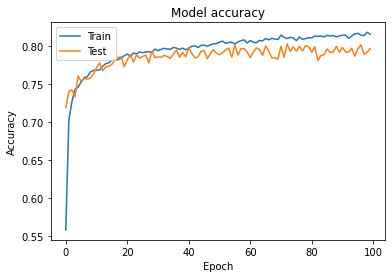

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

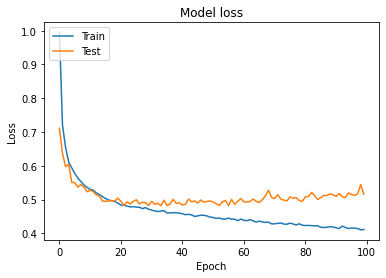

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [26]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
